# Prework

In [ ]:
#Anne was here making some changes to mess up the code

In [15]:
#import kaggle       
#kaggle.api.authenticate()
#kaggle.api.dataset_download_files('API command here', path='Resources', unzip=True)

#API commands used from Kaggle:
#Boston: AnalyzeBoston/crimes-in-boston
#Baltimore: sohier/crime-in-baltimore
#Philadelphia: mchirico/philadelphiacrimedata
#Solar & Lunar: nasa/solar-eclipses
#Full Moon: lsind18/full-moon-calendar-1900-2050

In [4]:
# #Dependencies
# import pandas as pd
# import numpy as np
# import os
# import time

# #File load
# boston = "Resources/boston_crime_data.csv"
# philadelphia = "Resources/philadelphia_crime_data.csv"
# baltimore = "Resources/balitmore_crime_data.csv"

# #Read file and store into pandas data frame
# boston_data_df = pd.read_csv(boston, sep = ',')
# philadelphia_data_df = pd.read_csv(philadelphia, sep = ',')
# baltimore_data_df = pd.read_csv(baltimore, sep = ',')


In [5]:
#boston_data_df.head()
#baltimore_data_df.head()
#philadelphia_data_df.head()

In [6]:
# #Sort through data to make smaller, finding only requested year
# #Philadephia
# philadelphia_data_df['Dispatch_Date']= pd.to_datetime(philadelphia_data_df['Dispatch_Date'])
# philadelphia_data_df2 = philadelphia_data_df[philadelphia_data_df['Dispatch_Date'].dt.year == 2016]
# #Also reduce column size to fit into git repository 
# philadelphia_data_df3 = philadelphia_data_df2[['Dispatch_Date', 'Text_General_Code']].copy()
# philadelphia_data_df3['Text_General_Code'].value_counts()

# #Original files too large to upload to GitHub. 
# #Isolated year 2016, selected desired columns then saved and uploaded shortened version
# philadelphia_data_df3.to_csv('Resources/philadelphia_data_df3.csv')

In [7]:
# #Sort through data to make smaller, finding only requested year
# #Boston
# boston_data_df['OCCURRED_ON_DATE']= pd.to_datetime(boston_data_df['OCCURRED_ON_DATE'])
# boston_data_df2 = boston_data_df[boston_data_df['OCCURRED_ON_DATE'].dt.year == 2016]

# #Original files too large to upload to GitHub. 
# #Isolated year 2016 then saved and uploaded shortened version
# boston_data_df2.to_csv('Resources/boston_data_df3.csv')

In [8]:
# #Sort through data to make smaller, finding only requested year
# #Baltimore
# baltimore_data_df['CrimeDate']= pd.to_datetime(baltimore_data_df['CrimeDate'])
# baltimore_data_df2 = baltimore_data_df[baltimore_data_df['CrimeDate'].dt.year == 2016]

# #Original files too large to upload to GitHub. 
# #Isolated year 2016 then saved and uploaded shortened version
# baltimore_data_df2.to_csv('Resources/baltimore_data_df3.csv')

# Lunar cycle effects on three major cities in eastern North America


In [25]:
#Dependencies
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#Load files
boston = "Resources/boston_data_df3.csv"
philadelphia = "Resources/philadelphia_data_df3.csv"
baltimore = "Resources/baltimore_data_df3.csv"
solar = "Resources/solar.csv"
lunar = "Resources/lunar.csv"
full_moon = "Resources/full_moon.csv"


#Read file and store into pandas data frame
boston_df = pd.read_csv(boston, sep = ',')
philadelphia_crime_2016 = pd.read_csv(philadelphia, sep = ',')
baltimore_df = pd.read_csv(baltimore, sep = ',')
solar_df = pd.read_csv(solar, sep = ',')
lunar_df = pd.read_csv(lunar, sep = ',')
full_moon_data_df = pd.read_csv(full_moon, sep = ',')


In [26]:
#Shorten  data frames to get just desired columns
#Boston
boston_crime_2016 = boston_df[['OCCURRED_ON_DATE','OFFENSE_CODE_GROUP' ,'OFFENSE_DESCRIPTION']].copy()
boston_crime_2016['OCCURRED_ON_DATE'] = pd.to_datetime(boston_crime_2016['OCCURRED_ON_DATE']).dt.normalize()
boston_crime_2016.rename(columns = {'OCCURRED_ON_DATE':'Crime Date', 'OFFENSE_CODE_GROUP':'Offense Description',
                                    'OFFENSE_DESCRIPTION':'Offense Specific' }, inplace = True)

#Baltimore
baltimore_crime_2016 = baltimore_df[['CrimeDate', 'Description', 'Weapon']].copy()
baltimore_crime_2016.rename(columns = {'CrimeDate':'Crime Date', 'Description':'Offense Description'}, inplace = True)
# baltimore_data_df3['Description'].value_counts()

#Philadelphia: 
# data already redcued in order to fit in git hub repository
philadelphia_crime_2016.rename(columns = {'Unnamed: 0': 'Prior Index', 'Dispatch_Date':'Crime Date', 'Text_General_Code':'Offense Description'}, inplace = True)
#del philadelphia_crime_2016['Unnamed: 0']

#Solar eclipse
#sort desired columns
solar_data_df = solar_df[['Calendar Date', 'Eclipse Time', 'Gamma', 'Eclipse Magnitude']].copy()
#sort desired year
solar_data_df['Calendar Date']= pd.to_datetime(solar_data_df['Calendar Date'], errors = 'coerce')
solar_eclipse_2016 = solar_data_df[solar_data_df['Calendar Date'].dt.year == 2016]

#Lunar eclipse
#sort desired columns
lunar_data_df = lunar_df[['Calendar Date', 'Eclipse Time', 'Gamma', 'Penumbral Eclipse Duration (m)', \
                             'Partial Eclipse Duration (m)', 'Total Eclipse Duration (m)']].copy()
#sort desired year
lunar_data_df['Calendar Date']= pd.to_datetime(lunar_data_df['Calendar Date'], errors = 'coerce')
lunar_eclipse_2016 = lunar_data_df[lunar_data_df['Calendar Date'].dt.year == 2016]

#Full Moon
#fix columns by renaming (removing space before name)
full_moon_data_df.columns = ['Day', 'Calendar Date', 'Time']

#set column date as date_time and sort to get desired year
full_moon_data_df['Calendar Date']= pd.to_datetime(full_moon_data_df['Calendar Date'])
full_moon_2016 = full_moon_data_df[full_moon_data_df['Calendar Date'].dt.year == 2016]

In [27]:
boston_crime_2016.head()
#baltimore_crime_2016.head(20)
#philadelphia_crime_2016.head(20)
#solar_eclipse_2016.head()
#lunar_eclipse_2016.head()
#full_moon_2016

,Crime Date,Offense Description,Offense Specific
0,2016-01-10,Fraud,FRAUD - IMPERSONATION
1,2016-07-01,Property Lost,PROPERTY - LOST
2,2016-08-06,Harassment,HARASSMENT
3,2016-05-01,Fraud,FRAUD - IMPERSONATION
4,2016-09-26,Counterfeiting,FORGERY / COUNTERFEITING


In [28]:
boston_crime_jan = boston_crime_2016[boston_crime_2016['Crime Date'].dt.month == 1]
boston_crime_jan.sort_values('Crime Date').reset_index(drop=True)

boston_crime_jan24 = boston_crime_jan[boston_crime_jan['Crime Date'].dt.day == 24]
#boston_crime_jan
#boston_crime_jan24

#boston_crime_jan['Crime Date'].value_counts().plot(kind='bar')
#plt.show()
boston_crime_jan.head()

,Crime Date,Offense Description,Offense Specific
0,2016-01-10,Fraud,FRAUD - IMPERSONATION
8,2016-01-01,Harassment,HARASSMENT
11,2016-01-01,Other,THREATS TO DO BODILY HARM
13,2016-01-01,Harassment,HARASSMENT
20,2016-01-12,Fraud,FRAUD - FALSE PRETENSE / SCHEME


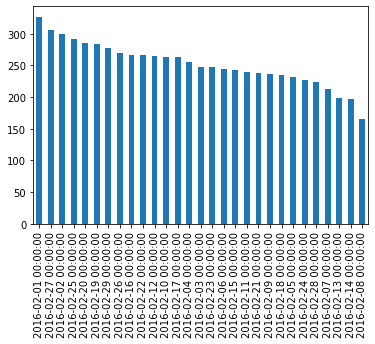

In [33]:
boston_crime_feb = boston_crime_2016[boston_crime_2016['Crime Date'].dt.month == 2]
day = mdates.DayLocator()

boston_crime_feb22 = boston_crime_jan[boston_crime_jan['Crime Date'].dt.day == 22]
#boston_crime_feb
#boston_crime_feb22

boston_crime_feb['Crime Date'].value_counts().plot(kind='bar')
#x_axis.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (7835,) and (31,)

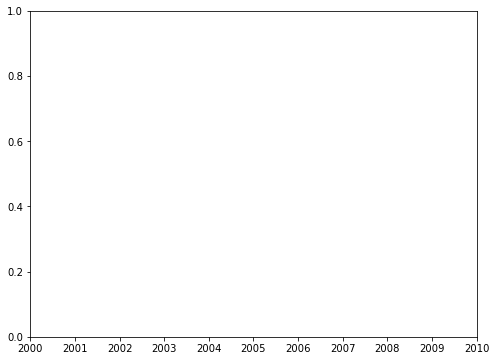

In [14]:
boston_crime_jan = boston_crime_2016[boston_crime_2016['Crime Date'].dt.month == 1]
boston_crime_jan24 = boston_crime_jan[boston_crime_jan['Crime Date'].dt.day == 24]

x_axis = boston_crime_jan['Crime Date']
y_axis = boston_crime_jan['Crime Date'].value_counts()

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.plot(x_axis, y_axis)  

plt.show()   

In [ ]:
#look at full moon day and find percentage of crime for the month that occured on that day

#Add all full moon percentages and compare to whole year percentage

#specific type of crime that happened on the full moon nights?

#lunar/ solar days and crime